In [26]:
# Importing all necessary packages

import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
# Reading the csv data file

ri = pd.read_csv('ri.csv')
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


##  Figuring out number of null values in each column

In [28]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [29]:
#Finding out the total number of rows

ri.shape[0]

91741

** Questions :  **
    1. Calculating who drives more faster, male or female?
    2. Frequency of different violations in different age-groups
    3. Frequency of search conduction in various races
    4. Rate of violations during night
    5. Searching those arrested in various search types
    6. Count those caught for frisk
    7. Analysis on drug_related_stops
    


# Q 1. Calculating who drives more faster, male or female?

In [30]:
total_males = ri[(ri.driver_gender == 'M')].shape[0]
total_females = ri[(ri.driver_gender == 'F')].shape[0]
males_speed = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')].shape[0]
females_speed = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')].shape[0]

male_freq = (float(males_speed) / total_males)*100
female_freq = (float(females_speed)/total_females)*100

In [31]:
ri.groupby(['driver_gender']).violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


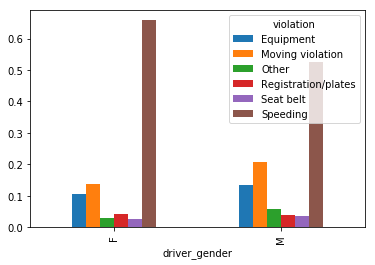

In [32]:
#ri.driver_gender.value_counts()

ri.groupby(['driver_gender']).violation.value_counts(normalize=True).unstack().plot(kind = 'bar')

 #### Observation:

Percent of female driver having 'Speeding' violation among the female drivers : 65.850  
Percent of male driver having 'Speeding' violation among the male drivers : 52.435  

**From the above analysis, we can say that female drivers are more often caught for 'Speeding' violation.**

#  Q 2. Frequency of different violations in different age-groups

In [33]:
# plotting bar graph from scratch

s = []
for i in range(1,10):
    value = ri[(ri.driver_age > i*10) & (ri.driver_age <= (i+1)*10)].shape[0]
    s.append(value)
index = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df = pd.DataFrame({'speed' : s}, index = index)

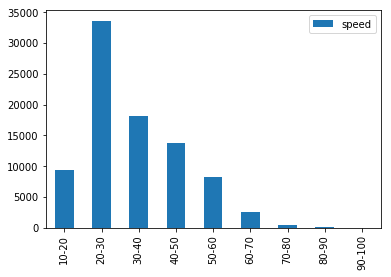

In [34]:
df.plot.bar()

In [35]:
# Figuring out the count of each violation for different age groups
ri.groupby(['driver_age']).violation.value_counts().unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_age,,,,,,
15.0,NaN,4.0,NaN,NaN,NaN,1.0
16.0,5.0,7.0,2.0,5.0,NaN,26.0
17.0,56.0,77.0,10.0,10.0,8.0,424.0
18.0,200.0,231.0,34.0,48.0,39.0,1181.0
19.0,457.0,447.0,78.0,93.0,79.0,2074.0
20.0,540.0,554.0,94.0,147.0,105.0,2354.0
21.0,623.0,634.0,97.0,144.0,152.0,2412.0
22.0,601.0,630.0,117.0,182.0,142.0,2453.0
23.0,664.0,666.0,90.0,167.0,157.0,2242.0


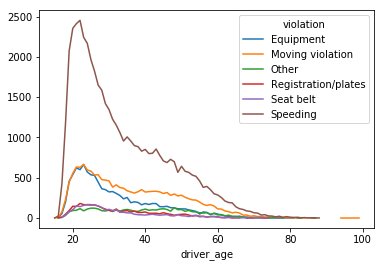

In [36]:
# plotting the violation frequency in different age groups

ri.groupby(['driver_age']).violation.value_counts().unstack().plot()

** Observation : **
1. Speeding violation is more common than other violations in all ages.
2. The count of speeding violations is highest in younger ages , 20-30.

# Q 3. Frequency of search conduction in various races

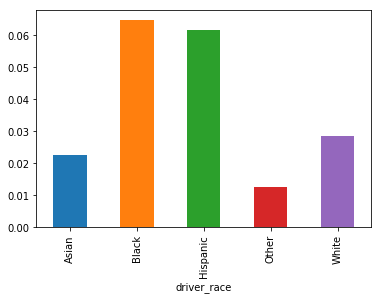

In [37]:
# plotting the frequency of search conducted across different races

ri.groupby(['driver_race']).search_conducted.value_counts(normalize=True).unstack().loc[:,True].plot(kind='bar')


#### From the above bar graph, we can conclude that Black and Hispanic people have most search conducted than other races.

# Q 4. Rate of violations during night

In [38]:
## combined the date and time columns for further operations

ri['combined'] = ri['stop_date'].map(str) + ' ' + ri['stop_time']
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
combined               object
dtype: object

In [15]:
## Conversion of new column to date-time format
ri.combined = pd.to_datetime(ri.combined)

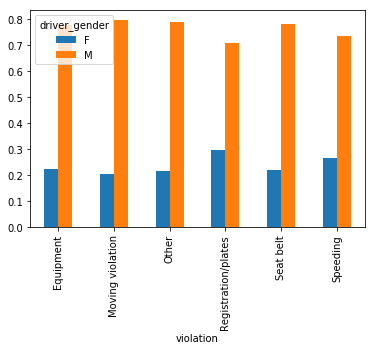

In [16]:
ri[(ri.combined.dt.time.map(str) > '17:15:00') | (ri.combined.dt.time.map(str) < '05:15:00') ].groupby(['violation']).driver_gender.value_counts(normalize=True).unstack().plot(kind = 'bar')

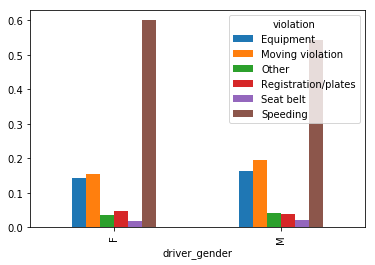

In [17]:
ri[(ri.combined.dt.time.map(str) > '17:15:00') | (ri.combined.dt.time.map(str) < '05:15:00') ].groupby(['driver_gender']).violation.value_counts(normalize=True).unstack().plot(kind = 'bar')

##### From the above data and bar graph, there are not much more differences between male and female driver having same violations at night.

# Q 5.  Searching those arrested in various search types

In [18]:
ri.groupby(['search_type']).stop_outcome.value_counts().unstack()['Arrest Driver']

search_type
Incident to Arrest                                          575.0
Incident to Arrest,Inventory                                 86.0
Incident to Arrest,Inventory,Probable Cause                  22.0
Incident to Arrest,Inventory,Protective Frisk                 8.0
Incident to Arrest,Inventory,Reasonable Suspicion             3.0
Incident to Arrest,Probable Cause                            50.0
Incident to Arrest,Probable Cause,Protective Frisk            5.0
Incident to Arrest,Probable Cause,Reasonable Suspicion        2.0
Incident to Arrest,Protective Frisk                          18.0
Incident to Arrest,Protective Frisk,Reasonable Suspicion      1.0
Incident to Arrest,Reasonable Suspicion                       5.0
Inventory                                                    45.0
Inventory,Probable Cause                                      9.0
Inventory,Probable Cause,Protective Frisk                     1.0
Inventory,Probable Cause,Reasonable Suspicion                 Na

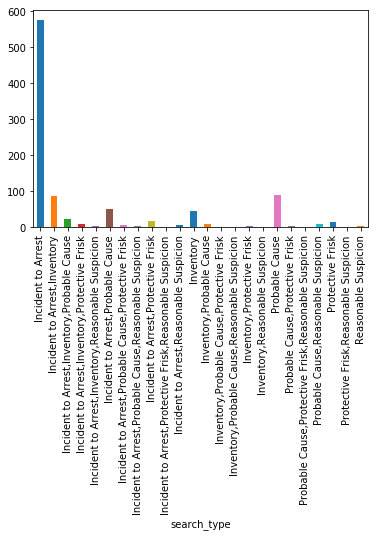

In [19]:
ri.groupby(['search_type']).stop_outcome.value_counts().unstack()['Arrest Driver'].plot(kind='bar')

# Q 6. Count those caught for frisk

In [20]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [21]:
ri.frisk.value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [22]:
ri[ri.search_type.str.contains('Protective Frisk') == True].driver_gender.value_counts()

M    245
F     29
Name: driver_gender, dtype: int64

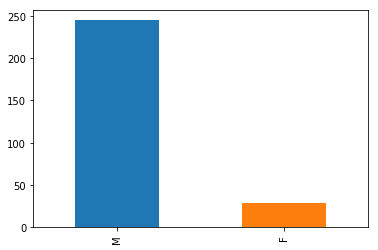

In [23]:
ri[ri.search_type.str.contains('Protective Frisk') == True].driver_gender.value_counts().plot(kind = 'bar')

**Concluding that Male Drivers are having more 'Protective Frisk' as search type than Female Driver. **

# Q 7. Analysis on drug_related_stops

In [24]:
ri.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [25]:
ri[ri.drugs_related_stop == True].combined.value_counts()

2005-10-01 00:00:00    2
2014-08-15 11:05:00    2
2015-10-30 08:38:00    2
2006-02-21 01:40:00    2
2011-05-07 15:55:00    1
2014-05-21 13:25:00    1
2014-03-27 13:52:00    1
2013-10-12 15:11:00    1
2015-02-28 23:35:00    1
2007-10-21 15:37:00    1
2008-11-18 01:48:00    1
2012-03-12 13:20:00    1
2011-07-15 11:27:00    1
2005-10-24 14:10:00    1
2012-06-10 18:08:00    1
2012-04-15 11:13:00    1
2015-05-14 09:43:00    1
2007-09-15 15:40:00    1
2010-04-21 02:00:00    1
2013-05-14 03:24:00    1
2012-05-24 23:40:00    1
2015-07-12 22:58:00    1
2015-04-18 10:32:00    1
2011-07-28 07:15:00    1
2015-07-16 10:01:00    1
2008-09-14 20:31:00    1
2014-01-12 10:59:00    1
2015-07-05 10:15:00    1
2014-02-24 00:26:00    1
2015-09-14 02:04:00    1
                      ..
2013-02-06 02:02:00    1
2014-09-23 00:35:00    1
2008-11-01 00:51:00    1
2012-01-25 00:07:00    1
2010-06-22 22:32:00    1
2011-06-05 10:27:00    1
2012-01-11 18:01:00    1
2012-02-04 13:38:00    1
2006-10-13 03:20:00    1
